In [1]:
import os
import glob
import pickle
import numpy as np

import matplotlib.pyplot as plt

from custom_gen import StyleGANGenerator
import cv2

In [2]:
_stylegan_ffhq_f_gdrive_url = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-ffhq-config-f.pkl'

In [3]:
feature_direction_file = glob.glob('first_try/feature_direction_*.pkl')[-1]
with open(feature_direction_file, 'rb') as f:
    feature_direction_dict = pickle.load(f)

feature_direction = feature_direction_dict['direction']
feature_names = np.array(feature_direction_dict['name'])

In [4]:
rnd = np.random.RandomState()
gen = StyleGANGenerator(_stylegan_ffhq_f_gdrive_url)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [39]:
latents = rnd.randn(10, *gen.Gs.input_shape[1:])
imgs1 = gen.get_images(latents)

latents -= feature_direction[:, 3]
imgs2 = gen.get_images(latents)

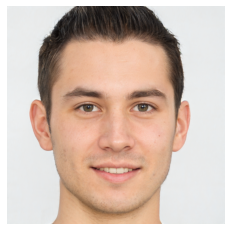

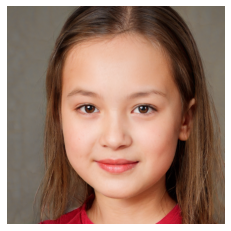

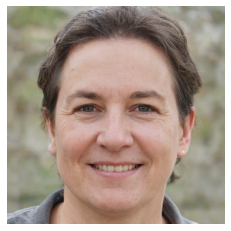

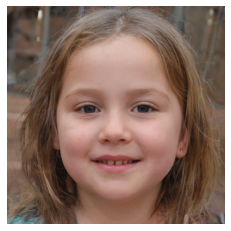

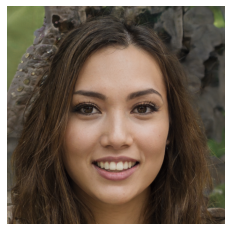

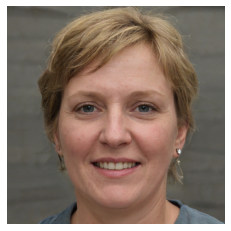

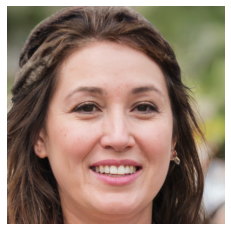

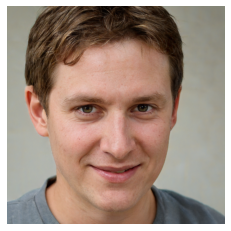

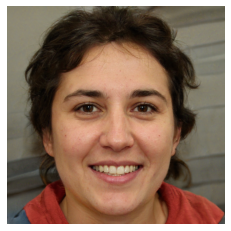

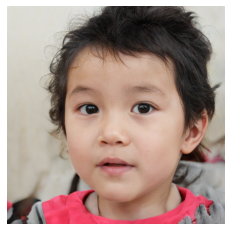

In [40]:
for img in imgs1:
    plt.axis("off")
    plt.imshow(img/255)
    plt.show()

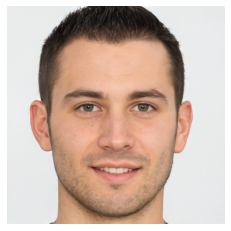

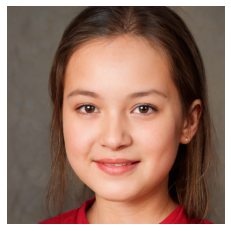

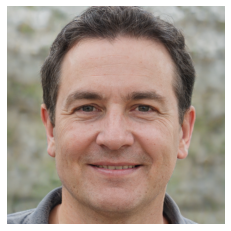

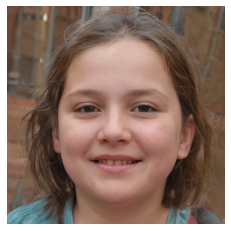

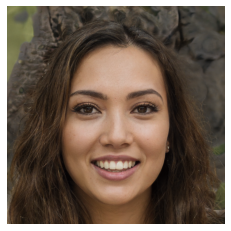

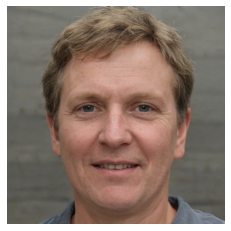

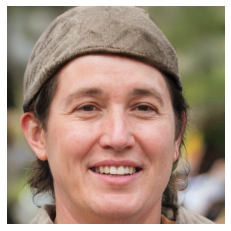

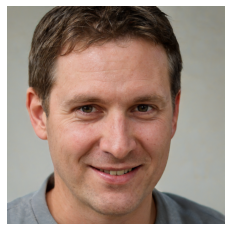

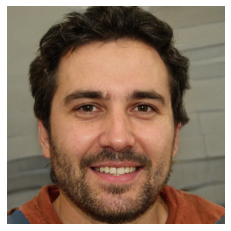

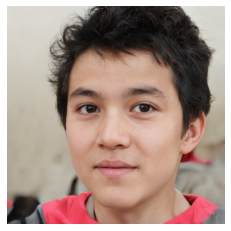

In [41]:
for img in imgs2:
    plt.axis("off")
    plt.imshow(img/255)
    plt.show()

In [8]:
feature_names

array(['Eyeglasses', 'Smiling', 'Wearing_Lipstick', 'No_Beard', 'Young'],
      dtype='<U16')

In [42]:
for i, img in enumerate(imgs2):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #img = cv2.resize(img, (256,256), interpolation=cv2.INTER_LANCZOS4)
    cv2.imwrite('1024-beard-generated-' + str(i) + '.png', img)

In [43]:
for i, img in enumerate(imgs1):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #img = cv2.resize(img, (256,256), interpolation=cv2.INTER_LANCZOS4)
    cv2.imwrite('1024-beard-real-' + str(i) + '.png', img)

TypeError: Invalid shape (512,) for image data

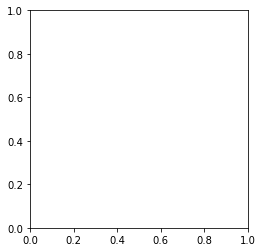